In [1]:
from functions import *

**Find commonly downregulated clusters and their secretion details**

In [41]:
info = pd.read_csv('cluster_info.csv')

In [42]:
# Import data

cluster_8156 = pd.read_csv('/home/oliver/CRConedriveData/maaslin/DRA008156/2_groups/clustered_NoNorm/all_results.tsv', sep='\t')

cluster_7774 = pd.read_csv('/home/oliver/CRConedriveData/maaslin/PRJEB7774_cluster/Maaslin2ResultsNoNorm/all_results.tsv', sep='\t')

cluster_info = pd.read_csv('cluster_info.csv')


In [43]:
# Scale data

cluster_8156 = scale_values(cluster_8156)

cluster_7774 = scale_values(cluster_7774)

In [44]:
display(cluster_8156.head())
display(cluster_7774.head())

,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval,scaled_value
0,A0A1C5VJV2,Group,Cancer,-3.249048e-07,1.020391e-07,555,345,0.001534,0.027606,-3.589726
1,A0A1U7M8N9,Group,Cancer,-7.197612e-07,2.234200e-07,555,488,0.001350,0.027606,-3.589726
2,A0A2A5RNG4,Group,Cancer,-1.400740e-07,4.922941e-08,555,459,0.004601,0.055212,-2.896584
3,A0A1C6J839,Group,Cancer,-7.683877e-07,2.833884e-07,555,453,0.006908,0.062169,-2.777897
4,A0A1C5UUU7,Group,Cancer,-4.316223e-07,1.646689e-07,555,501,0.009004,0.064832,-2.735958


,feature,metadata,value,coef,stderr,N,N.not.0,pval,qval,scaled_value
0,A0A6V8LYJ9,sample_title,Carcinoma,-0.000017,4.975236e-06,155,152,0.000595,0.045248,-3.095598
1,A0A1C5KMM8,sample_title,Carcinoma,-0.000009,3.171932e-06,155,155,0.005598,0.101323,-2.289445
2,A0A1C5VJV2,sample_title,Carcinoma,-0.000001,3.732972e-07,155,123,0.006666,0.101323,-2.289445
3,A0A1U7M8N9,sample_title,Carcinoma,-0.000004,1.472907e-06,155,155,0.006437,0.101323,-2.289445
4,A0A1Y2MSQ6,sample_title,Carcinoma,-0.000003,8.443943e-07,155,155,0.003496,0.101323,-2.289445


In [45]:
cluster_7774 = cluster_7774[cluster_7774['value'] == 'Carcinoma']

cluster_7774.rename(columns={'scaled_value': '7774_scaled_values'}, inplace=True)

cluster_8156.rename(columns={'scaled_value': '8156_scaled_values'}, inplace=True)

merged_clusters = cluster_7774.merge(cluster_8156[['feature', '8156_scaled_values']], on='feature', how='left')

In [47]:
# merged_clusters['secreted'] = merged_clusters.apply(lambda row: cluster_info.loc[cluster_info['cluster_id'] == row['feature'], 'secreted'].values[0], axis=1)

# merged_clusters['proteins'] = merged_clusters.apply(lambda row: cluster_info.loc[cluster_info['cluster_id'] == row['feature'], 'proteins'].values[0], axis=1)
# merged_clusters['secreted_ratio'] = merged_clusters['secreted'] / merged_clusters['proteins']

merged_clusters['secreted'] = merged_clusters.apply(lambda row: cluster_info.loc[cluster_info['cluster_id'] == row['feature'], 'secreted'].values[0], axis=1)
merged_clusters['proteins'] = merged_clusters.apply(lambda row: cluster_info.loc[cluster_info['cluster_id'] == row['feature'], 'proteins'].values[0], axis=1)
merged_clusters['secreted_ratio'] = merged_clusters['secreted'] / merged_clusters['proteins']



IndexError: index 0 is out of bounds for axis 0 with size 0

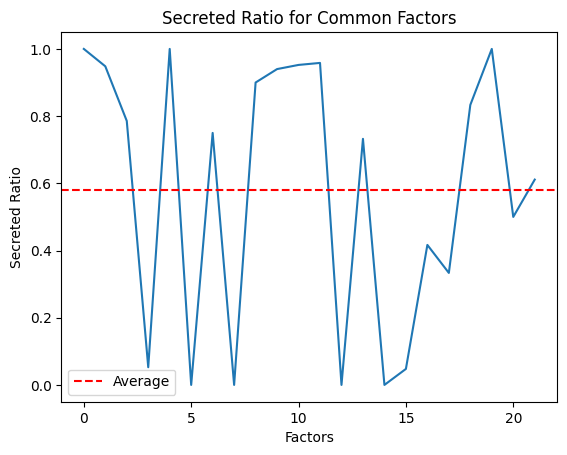

In [25]:
x = range(len(common_factors))
y = common_factors['secreted_ratio']

average = y.mean()

plt.plot(x, y)
plt.axhline(average, color='r', linestyle='--', label='Average')
plt.xlabel('Factors')
plt.ylabel('Secreted Ratio')
plt.title('Secreted Ratio for Common Factors')
plt.legend()
plt.show()
